In [2]:
#!usr/bin/python

""" Imports and plots the E values for the simulated vs. actual 
    ecosystem data. Also looks at the frequency distributions 
    of the E values in both simulated and actual fitted results."""

__author__ = 'Katie Hindson (kah15@ic.ac.uk)'
__version__ = '0.0.1'
		
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ******* BOTH CONVERTED & UNCONVERTED BIOTRAITS DATA *******

This is examing the E values for the data that contains BOTH converted and unconverted SA --> mass biotraits respiration rate values. 

In [2]:
actual_fits = pd.read_csv("../Results/sites_boltz_fit_results.csv")
simulated_fits = pd.read_csv("../Results/ALL_simulated_E_B0.csv")

In [3]:
# getting the list of siteIDs present in the simulated data (since not 
# all sites could be simulated successfully) and then using this list
# to extract the corresponding fit data from the actual data fits
sites = pd.Series.unique(simulated_fits.site_ID).tolist()

actual_fits = actual_fits[actual_fits['site_ID'].isin(sites)]

# check to see it worked
len(actual_fits.site_ID)

112

In [4]:
len(simulated_fits.site_ID)

112

In [4]:
# sorting into ascending order of siteID values since this way the indexing of the 
# two data frames will be the same.

actual_fits = actual_fits.sort_values(by = 'site_ID', ascending = True)
simulated_fits = simulated_fits.sort_values(by = 'site_ID', ascending = True)

actual_fits.head()

AIC         E ecosystem_type      lat       lnB0  norm_lnB0  \
130   6810.584115  0.419782             MF -33.4648  17.448825  34.966322   
129   7987.172054  0.488478            ENF -28.2395  21.465724  41.849882   
128  47495.484433  0.718924            GRA  47.1167  31.238337  61.239008   
126  14153.576916  0.144846            ENF -22.2830   4.874695  10.919125   
125  17651.681577  0.566528            SAV -34.0021  22.151611  45.792811   

         r_sq site_ID  
130  0.242537   ARSLu  
129  0.477397   ARVir  
128  0.472491   ATNeu  
126  0.008791   AUASM  
125  0.246078   AUCpr

In [5]:
simulated_fits.head()

E       lnB0      r_sq site_ID
0  0.620837  17.549457  0.881892   ARSLu
1  0.460004   8.196096  0.991006   ARVir
2       NaN        NaN       NaN   ATNeu
3  0.633464   8.303402  1.000000   AUASM
4  0.873391  28.495240  0.936984   AUCpr

Making a data frame of the site IDs and their corresponding E simulated and E actual. 

In [6]:
E_vals = pd.DataFrame({'site_ID' : simulated_fits.site_ID, 'E_simulated' : simulated_fits.E, 
                       'E_actual' : actual_fits.E, 'ecosystem_type' : actual_fits.ecosystem_type,
                      'lat' : actual_fits.lat})

# removing any values that are Nan
E_vals = E_vals[E_vals.site_ID.notnull()]
E_vals = E_vals[E_vals.E_simulated.notnull()]
E_vals = E_vals[E_vals.E_actual.notnull()]

# making a list of the ecosystem type as index values and adding this 
# to the data frame so that I can then colour code the E values by 
# ecosystem type 
ecotypes, indices = np.unique(E_vals.ecosystem_type, return_inverse=True)

E_vals.loc[:,'ecotype_index'] = indices

E_vals.head()

E_actual  E_simulated ecosystem_type      lat site_ID  ecotype_index
3  0.642911     0.633464            ENF  46.6188   AUASM              4
4  0.843119     0.873391            OSH  46.6249   AUCpr              7
5  0.662818     0.595113            ENF  46.7393   AUCum              4
6  0.465215     0.580245            DBF  46.6347   AUEmr              2
7  0.739658     0.508532            ENF  46.6188   AURig              4

## Simulated vs. Actual Es
Plotting the E values from simulated vs. actual data. Also drawing a 1:1 line on the plot so that we can determine if there is some obvious parallel displacement from this line (or something else interesting). 

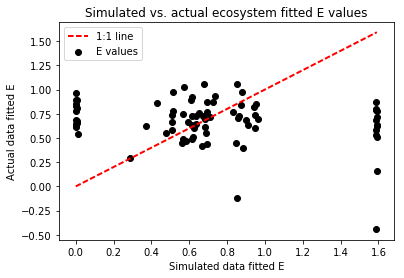

In [7]:
%matplotlib inline
plt.scatter(E_vals.E_simulated, E_vals.E_actual, c = 'black', label = 'E values')
plt.plot(([0, max(E_vals.E_simulated)]), ([0, max(E_vals.E_simulated)]),'r--', lw=2, label = '1:1 line')
plt.title('Simulated vs. actual ecosystem fitted E values')
plt.ylabel('Actual data fitted E')
plt.xlabel('Simulated data fitted E')
plt.legend()

## Simulated vs. Actual Es and ecosystem type
Plotting the E values from simulated vs. actual data colour coded by their ecosystem type to see if there is any visible clustering. 

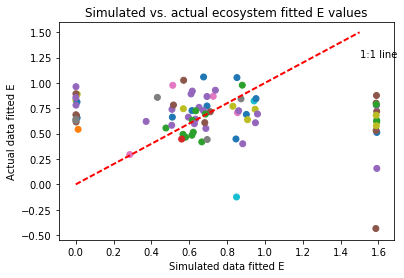

In [8]:
%matplotlib inline
plt.scatter(E_vals.E_simulated, E_vals.E_actual, c = E_vals.ecotype_index, cmap = 'Vega10')
plt.plot(([0, 1.5]), ([0, 1.5]),'r--', lw=2, label = '1:1 line')
plt.text(1.5, 1.25, '1:1 line')
plt.title('Simulated vs. actual ecosystem fitted E values')
plt.ylabel('Actual data fitted E')
plt.xlabel('Simulated data fitted E')

## Simulated Es
Plotting the shape of the distributions for the simulated data's fitted E values.

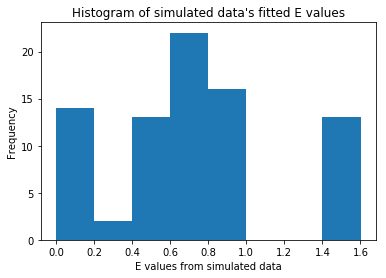

In [9]:
%matplotlib inline
binwidth = 0.2
plt.hist(E_vals.E_simulated, bins=np.arange(min(E_vals.E_simulated), max(E_vals.E_simulated) + binwidth, binwidth))
plt.xlabel('E values from simulated data')
plt.ylabel('Frequency')
plt.title("Histogram of simulated data's fitted E values")

In [10]:
# median and mean value of simulated Es
print("median: " + str(np.median(E_vals.E_simulated)))
print("mean: " + str(np.mean(E_vals.E_simulated)))

median: 0.670309719144
mean: 0.714098559173


## Actual Es
Plotting the shape of the distributions for the actual data's fitted E values. `

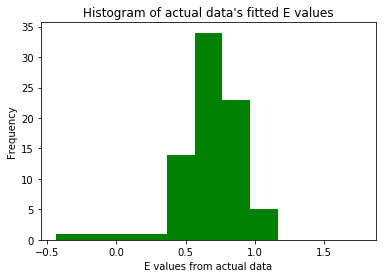

In [11]:
%matplotlib inline
binwidth = 0.2
plt.hist(E_vals.E_actual, bins=np.arange(min(E_vals.E_actual), max(E_vals.E_simulated) + binwidth, binwidth),
         color = 'green')
plt.xlabel('E values from actual data')
plt.ylabel('Frequency')
plt.title("Histogram of actual data's fitted E values")

In [12]:
# median and mean value of actual Es
print("median: " + str(np.median(E_vals.E_actual)))
print("mean: " + str(np.mean(E_vals.E_actual)))

median: 0.693408141058
mean: 0.675078104267


## Biotraits E data...all data
Looking at the distributions of activation energies and B0 values in the biotraits fitted TPCs.

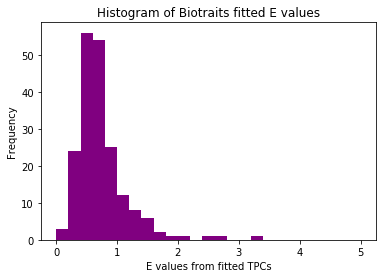

In [13]:
biotraits = pd.read_csv("../Data/biotraits/ALL_ID_Ea_B0.csv")
%matplotlib inline
binwidth = 0.2
plt.hist(biotraits.Ea, bins = np.arange(min(biotraits.Ea), 5 + binwidth, binwidth), 
         color = 'purple')
plt.xlabel('E values from fitted TPCs')
plt.ylabel('Frequency')
plt.title('Histogram of Biotraits fitted E values')

# ******* ONLY UNCONVERTED BIOTRAITS DATA *******

This is examing the E values for the data that contains ONLY NOT converted biotraits respiration rate values. 

In [3]:
actual_fits = pd.read_csv("../Results/sites_boltz_fit_results.csv")
simulated_fits_unconverted = pd.read_csv("../Results/NOT_CONVERTED_simulated_E_B0.csv")

In [4]:
# getting the list of siteIDs present in the simulated data (since not 
# all sites could be simulated successfully) and then using this list
# to extract the corresponding fit data from the actual data fits
sites = pd.Series.unique(simulated_fits_unconverted.site_ID).tolist()

actual_fits = actual_fits[actual_fits['site_ID'].isin(sites)]

# sorting into ascending order of siteID values since this way the indexing of the 
# two data frames will be the same.

actual_fits = actual_fits.sort_values(by = 'site_ID', ascending = True)
simulated_fits_unconverted = simulated_fits_unconverted.sort_values(by = 'site_ID', ascending = True)

Making a data frame of the site IDs and their corresponding E simulated and E actual.

In [16]:
E_vals_unc = pd.DataFrame({'site_ID' : simulated_fits_unconverted.site_ID, 'E_simulated' : simulated_fits_unconverted.E, 
                       'E_actual' : actual_fits.E, 'lat': actual_fits.lat})

# removing any values that are Nan
E_vals_unc = E_vals_unc[E_vals_unc.site_ID.notnull()]
E_vals_unc = E_vals_unc[E_vals_unc.E_simulated.notnull()]
E_vals_unc = E_vals_unc[E_vals_unc.E_actual.notnull()]

## Simulated vs. Actual Es...Not Converted
Plotting the E values from simulated vs. actual data. Also drawing a 1:1 line on the plot so that we can determine if there is some obvious parallel displacement from this line (or something else interesting). 

Fitted slope of simulated vs. actual E values: 0.048082501909
R-squared value of the fit: 0.000629432132733


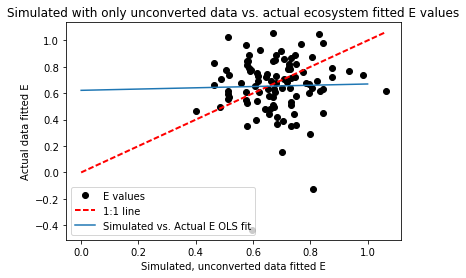

In [17]:
%matplotlib inline
plt.plot(E_vals_unc.E_simulated, E_vals_unc.E_actual, 'ko', label = 'E values')
plt.plot(([0, max(E_vals_unc.E_simulated)]), ([0, max(E_vals_unc.E_simulated)]), 'r--', lw=2, label = '1:1 line')
plt.title('Simulated with only unconverted data vs. actual ecosystem fitted E values')
plt.ylabel('Actual data fitted E')
plt.xlabel('Simulated, unconverted data fitted E')
import statsmodels.api as sm
X = E_vals_unc.E_simulated
Y = E_vals_unc.E_actual
X = sm.add_constant(X)
fit = sm.OLS(Y, X).fit()
B = fit.params[0].astype('float')
m = fit.params[1].astype('float')
sim_vs_actual_fit_x = np.arange(0, max(E_vals_unc.E_simulated), 0.1)
sim_vs_actual_fit_y = m*sim_vs_actual_fit_x + B
plt.plot(sim_vs_actual_fit_x, sim_vs_actual_fit_y, label = 'Simulated vs. Actual E OLS fit')
plt.legend()

print("Fitted slope of simulated vs. actual E values: " + str(m))
print("R-squared value of the fit: " + str(fit.rsquared))

## Simulated Es...Not Converted
Plotting the shape of the distributions for the simulated data's fitted E values.

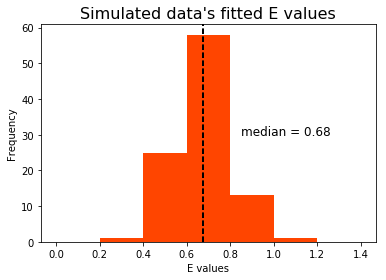

In [18]:
%matplotlib inline
binwidth = 0.2
plt.hist(E_vals_unc.E_simulated, 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'orangered')
plt.xlabel('E values')
plt.ylabel('Frequency')
plt.axvline(E_vals_unc.E_simulated.median(), color='k', linestyle='dashed', linewidth=2)
plt.text(0.85, 30, 'median = ' + str(np.round(E_vals_unc.E_simulated.median(), 2)), fontsize = 12)
plt.title("Simulated data's fitted E values", fontsize = 16)

In [8]:
# median and mean values of the simulated Es
print("median: " + str(np.median(E_vals_unc.E_simulated)))
print("mean: " + str(np.mean(E_vals_unc.E_simulated)))

median: 0.675788140272
mean: 0.679323504679


## Actual data...only unconverted data 

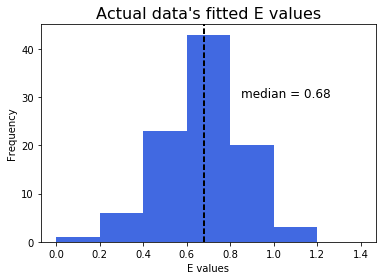

In [9]:
%matplotlib inline
binwidth = 0.2
plt.hist(E_vals_unc.E_actual, 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'royalblue')
plt.xlabel('E values')
plt.ylabel('Frequency')
plt.axvline(E_vals_unc.E_actual.median(), color='k', linestyle='dashed', linewidth=2)
plt.text(0.85, 30, 'median = ' + str(np.round(E_vals_unc.E_actual.median(), 2)), fontsize = 12)
plt.title("Actual data's fitted E values", fontsize = 16)

In [10]:
# median and mean values of the simulated Es
print("median: " + str(np.median(E_vals_unc.E_actual)))
print("mean: " + str(np.mean(E_vals_unc.E_actual)))

median: 0.679430991852
mean: 0.654919408815


## Biotraits E data...only unconverted data
Looking at the distributions of activation energies and B0 values in the biotraits fitted TPCs.

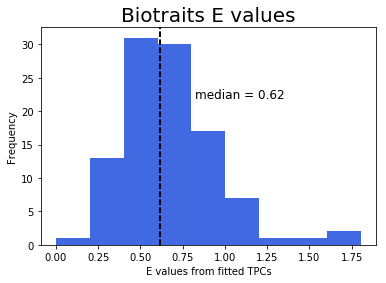

In [11]:
biotraits_unc = pd.read_csv("../Data/biotraits/NOT_CONVERTED_ID_Ea_B0.csv")
%matplotlib inline
binwidth = 0.2
plt.hist(biotraits_unc.Ea, bins = np.arange(min(biotraits_unc.Ea), max(biotraits_unc.Ea) + binwidth, binwidth), 
         color = 'royalblue')
plt.axvline(biotraits_unc.Ea.median(), color='k', linestyle='dashed', linewidth=2)
plt.text(0.82, 22, 'median = ' + str(np.round(biotraits_unc.Ea.median(), 2)), fontsize = 12)
plt.xlabel('E values from fitted TPCs')
plt.ylabel('Frequency')
plt.title('Biotraits E values', fontsize = 20)

In [12]:
biotraits_unc.Ea.median()

0.618218836304077

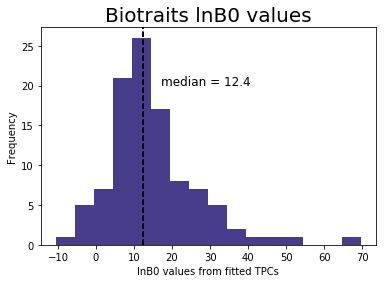

In [13]:
binwidth = 5
plt.hist(biotraits_unc.lnB0, bins = np.arange(min(biotraits_unc.lnB0), max(biotraits_unc.lnB0) + binwidth, binwidth), 
         color = 'darkslateblue')
plt.axvline(biotraits_unc.lnB0.median(), color='k', linestyle='dashed', linewidth=2)
plt.text(17, 20, 'median = ' + str(np.round(biotraits_unc.lnB0.median(), 2)), fontsize = 12)
plt.xlabel('lnB0 values from fitted TPCs')
plt.ylabel('Frequency')
plt.title('Biotraits lnB0 values', fontsize = 20)

# Comparing latitude in simulated vs. actual E fits

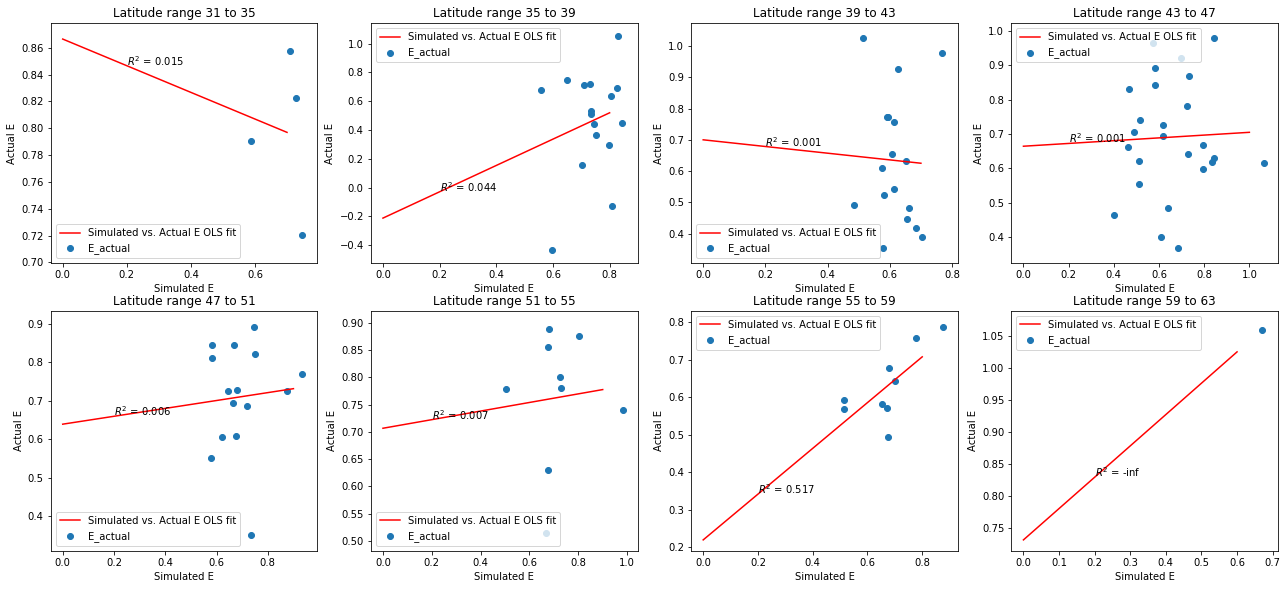

In [79]:
fig = plt.figure(figsize=(22, 15)) 

number_of_groups = 8

# Making similar scatter plots for the outlier data (with fitted E > 1.0)
# and again, overlaying the simulated data in orange.
i = 1

# Changing the latitude values to integers so that they can be grouped more easily
E_vals_unc.lat = E_vals_unc.lat.astype('int')
lats = E_vals_unc.groupby('lat')

min_lat = min(E_vals_unc.lat)
max_lat = max(E_vals_unc.lat)
step = (max_lat - min_lat) / number_of_groups

for j in range(number_of_groups):
    max_lat = min_lat + step
    
    data = E_vals_unc[(E_vals_unc.lat >= min_lat) & (E_vals_unc.lat < max_lat)]
    
    E_simulated = data['E_simulated']
    E_actual = data['E_actual']
    if number_of_groups%3 > 0:
        # If I need to add another row below because the number of groups is not 
        # divisible by 3 with no remainder...
        plt.subplot((number_of_groups/3) + 1,number_of_groups/(number_of_groups/3),i)
    else:
        plt.subplot(number_of_groups/3,number_of_groups/(number_of_groups/3),i)
    plt.scatter(E_simulated, E_actual)
    plt.title('Latitude range ' + str(min_lat) + ' to ' + str(max_lat))
    plt.xlabel('Simulated E')
    plt.ylabel('Actual E')
    i = i + 1
    min_lat = max_lat
    
    X = data.E_simulated
    Y = data.E_actual
    X = sm.add_constant(X)
    fit = sm.OLS(Y, X).fit()
    B = fit.params[0].astype('float')
    m = fit.params[1].astype('float')
    sim_vs_actual_fit_x = np.arange(0, max(data.E_simulated), 0.1)
    sim_vs_actual_fit_y = m*sim_vs_actual_fit_x + B
    plt.plot(sim_vs_actual_fit_x, sim_vs_actual_fit_y, label = 'Simulated vs. Actual E OLS fit', color = 'red')
    plt.legend()
    plt.text(0.2, m*0.2+ B, "$R^2$ = " + str(np.round(fit.rsquared, 3)))
    
plt.show()

# Simulated vs. Actual E values for Unconverted Data only, using only MEDIAN temperature values and latitude DEPENDENT data

In [131]:
actual_fits = pd.read_csv("../Results/median_temps/sites_boltz_fit_median_temps_only_results.csv")
simulated_fits_med = pd.read_csv("../Results/median_temps/med_temps_NOT_CONVERTED_simulated_E_B0.csv")

In [132]:
# getting the list of siteIDs present in the simulated data (since not 
# all sites could be simulated successfully) and then using this list
# to extract the corresponding fit data from the actual data fits
sites = pd.Series.unique(simulated_fits_med.site_ID).tolist()

actual_fits = actual_fits[actual_fits['site_ID'].isin(sites)]

# sorting into ascending order of siteID values since this way the indexing of the 
# two data frames will be the same.

actual_fits = actual_fits.sort_values(by = 'site_ID', ascending = True)
simulated_fits_med = simulated_fits_med.sort_values(by = 'site_ID', ascending = True)

In [133]:
E_vals_med = pd.DataFrame({'site_ID' : simulated_fits_med.site_ID, 'E_simulated' : simulated_fits_med.E, 
                       'E_actual' : actual_fits.E})

# removing any values that are Nan
E_vals_med = E_vals_med[E_vals_med.site_ID.notnull()]
E_vals_med = E_vals_med[E_vals_med.E_simulated.notnull()]
E_vals_med = E_vals_med[E_vals_med.E_actual.notnull()]

E_vals_med.head()

E_actual  E_simulated site_ID
2  0.790150     0.593049   ATNeu
3  0.642911     0.608097   AUCpr
4  0.843119     0.576169   AUCum
5  0.662818     0.486257   AURig
6  0.465215     0.378267   AUTum

Fitted slope of simulated vs. actual E values: 0.0548061279139
R-squared value of the fit: 0.000856658974543


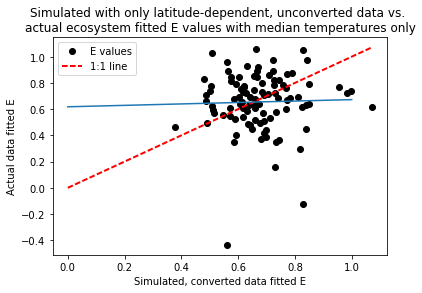

In [134]:
%matplotlib inline
plt.plot(E_vals_med.E_simulated, E_vals_med.E_actual, 'ko', label = 'E values')
plt.plot(([0, max(E_vals_med.E_simulated)]), ([0, max(E_vals_med.E_simulated)]), 'r--', lw=2, label = '1:1 line')
plt.title('Simulated with only latitude-dependent, unconverted data vs. \nactual ecosystem fitted E values with median temperatures only')
plt.ylabel('Actual data fitted E')
plt.xlabel('Simulated, converted data fitted E')
plt.legend()
import statsmodels.api as sm
X = E_vals_med.E_simulated
Y = E_vals_med.E_actual
X = sm.add_constant(X)
fit = sm.OLS(Y, X).fit()
B = fit.params[0].astype('float')
m = fit.params[1].astype('float')
sim_vs_actual_fit_x = np.arange(0, max(E_vals_med.E_simulated), 0.1)
sim_vs_actual_fit_y = m*sim_vs_actual_fit_x + B
plt.plot(sim_vs_actual_fit_x, sim_vs_actual_fit_y)

print("Fitted slope of simulated vs. actual E values: " + str(m))
print("R-squared value of the fit: " + str(fit.rsquared))

## Simulated Es...Not converted, latitude dependent, median temperature only included

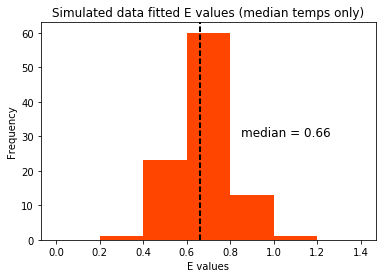

In [136]:
%matplotlib inline
binwidth = 0.2
plt.hist(E_vals_med.E_simulated, 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'orangered')
plt.xlabel('E values')
plt.ylabel('Frequency')
plt.axvline(E_vals_med.E_simulated.median(), color='k', linestyle='dashed', linewidth=2)
plt.text(0.85, 30, 'median = ' + str(np.round(E_vals_med.E_simulated.median(), 2)), fontsize = 12)
plt.title("Simulated data fitted E values (median temps only)")

In [100]:
# median and mean values of the simulated Es
print("median: " + str(np.median(E_vals_med.E_simulated)))
print("mean: " + str(np.mean(E_vals_med.E_simulated)))

median: 0.685356366247
mean: 0.81590230286


## Actual Es...Median Temperatures only 

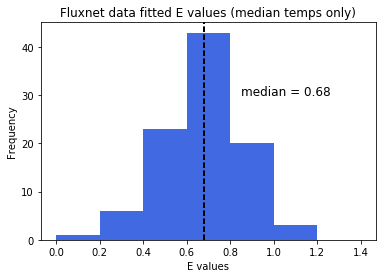

In [137]:
%matplotlib inline
binwidth = 0.2
plt.hist(E_vals_med.E_actual, bins=np.arange(0, 1.25 + binwidth, binwidth),
         color = 'royalblue')
plt.xlabel('E values')
plt.ylabel('Frequency')
plt.axvline(E_vals_med.E_actual.median(), color='k', linestyle='dashed', linewidth=2)
plt.text(0.85, 30, 'median = ' + str(np.round(E_vals_med.E_actual.median(), 2)), fontsize = 12)
plt.title("Fluxnet data fitted E values (median temps only)")

In [103]:
# median and mean values of the simulated Es
print("median: " + str(np.median(E_vals_med.E_actual)))
print("mean: " + str(np.mean(E_vals_med.E_actual)))

median: 0.679430991852
mean: 0.654919408815


In [107]:
print(E_vals_med.E_actual[E_vals_unc.site_ID == 'AUTum'])
print(E_vals_med.E_simulated[E_vals_unc.site_ID == 'AUTum'])

6    0.465215
Name: E_actual, dtype: float64
6    0.377388
Name: E_simulated, dtype: float64


# ******* ONLY CONVERTED BIOTRAITS DATA *******

This is examing the E values for the data that contains ONLY converted biotraits respiration rate values. 

In [31]:
actual_fits = pd.read_csv("../Results/sites_boltz_fit_results.csv")
simulated_fits_converted = pd.read_csv("../Results/CONVERTED_simulated_E_B0.csv")

In [32]:
# getting the list of siteIDs present in the simulated data (since not 
# all sites could be simulated successfully) and then using this list
# to extract the corresponding fit data from the actual data fits
sites = pd.Series.unique(simulated_fits_converted.site_ID).tolist()

actual_fits = actual_fits[actual_fits['site_ID'].isin(sites)]

# sorting into ascending order of siteID values since this way the indexing of the 
# two data frames will be the same.

actual_fits = actual_fits.sort_values(by = 'site_ID', ascending = True)
simulated_fits_converted = simulated_fits_converted.sort_values(by = 'site_ID', ascending = True)

Making a data frame of the site IDs and their corresponding E simulated and E actual.

In [33]:
E_vals_conv = pd.DataFrame({'site_ID' : simulated_fits_converted.site_ID, 'E_simulated' : simulated_fits_converted.E, 
                       'E_actual' : actual_fits.E})

# removing any values that are Nan
E_vals_conv = E_vals_conv[E_vals_conv.site_ID.notnull()]
E_vals_conv = E_vals_conv[E_vals_conv.E_simulated.notnull()]
E_vals_conv = E_vals_conv[E_vals_conv.E_actual.notnull()]

E_vals_conv.head()

E_actual  E_simulated site_ID
3  0.642911     0.632748   AUASM
4  0.843119     1.006776   AUCpr
5  0.662818     0.595260   AUCum
6  0.465215     0.580245   AUEmr
7  0.739658     0.090655   AURig

## Simulated vs. Actual Es...Converted
Plotting the E values from simulated vs. actual data. Also drawing a 1:1 line on the plot so that we can determine if there is some obvious parallel displacement from this line (or something else interesting). 

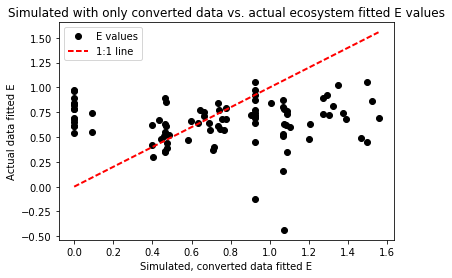

In [34]:
%matplotlib inline
plt.plot(E_vals_conv.E_simulated, E_vals_conv.E_actual, 'ko', label = 'E values')
plt.plot(([0, max(E_vals_conv.E_simulated)]), ([0, max(E_vals_conv.E_simulated)]), 'r--', lw=2, label = '1:1 line')
plt.title('Simulated with only converted data vs. actual ecosystem fitted E values')
plt.ylabel('Actual data fitted E')
plt.xlabel('Simulated, converted data fitted E')
plt.legend()

## Simulated Es...Converted
Plotting the shape of the distributions for the simulated data's fitted E values.

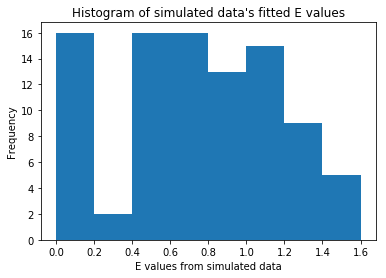

In [35]:
%matplotlib inline
binwidth = 0.2
plt.hist(E_vals_conv.E_simulated, 
         bins=np.arange(min(E_vals_conv.E_simulated), max(E_vals_conv.E_simulated) + binwidth, binwidth))
plt.xlabel('E values from simulated data')
plt.ylabel('Frequency')
plt.title("Histogram of simulated data's fitted E values")

In [36]:
# median and mean of simulated Es
print("median: " + str(np.median(E_vals_conv.E_simulated)))
print("mean: " + str(np.mean(E_vals_conv.E_simulated)))

median: 0.752838639037
mean: 0.733938147091


## Biotraits E data...only converted data
Looking at the distributions of activation energies and B0 values in the biotraits fitted TPCs.

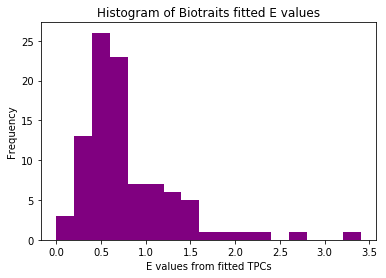

In [37]:
biotraits_conv = pd.read_csv("../Data/biotraits/CONVERTED_ID_Ea_B0.csv")
%matplotlib inline
binwidth = 0.2
plt.hist(biotraits_conv.Ea, bins = np.arange(min(biotraits_conv.Ea), max(biotraits_conv.Ea) + binwidth, binwidth), 
         color = 'purple')
plt.xlabel('E values from fitted TPCs')
plt.ylabel('Frequency')
plt.title('Histogram of Biotraits fitted E values')

# ******* LATITUDE-INDEPENDENT SPECIES SAMPLING *******

This is examing the E values for the data that contains ONLY converted biotraits respiration rate values where the species sampling for each site was latitude-independent.  

In [57]:
actual_fits = pd.read_csv("../Results/sites_boltz_fit_results.csv")
lat_indep_fits = pd.read_csv("../Results/lat_indep/lat_indep_simulated_E_B0.csv")

In [58]:
# getting the list of siteIDs present in the simulated data (since not 
# all sites could be simulated successfully) and then using this list
# to extract the corresponding fit data from the actual data fits
sites = pd.Series.unique(lat_indep_fits.site_ID).tolist()

actual_fits = actual_fits[actual_fits['site_ID'].isin(sites)]

# sorting into ascending order of siteID values since this way the indexing of the 
# two data frames will be the same.

actual_fits = actual_fits.sort_values(by = 'site_ID', ascending = True)
lat_indep_fits = lat_indep_fits.sort_values(by = 'site_ID', ascending = True)

Making a data frame of the site IDs and their corresponding E simulated and E actual.

In [59]:
E_vals_lat_indep = pd.DataFrame({'site_ID' : lat_indep_fits.site_ID, 'E_simulated' : lat_indep_fits.E, 
                       'E_actual' : actual_fits.E})

# removing any values that are Nan
E_vals_lat_indep = E_vals_lat_indep[E_vals_lat_indep.site_ID.notnull()]
E_vals_lat_indep = E_vals_lat_indep[E_vals_lat_indep.E_simulated.notnull()]
E_vals_lat_indep = E_vals_lat_indep[E_vals_lat_indep.E_actual.notnull()]

E_vals_lat_indep.head()

E_actual  E_simulated site_ID
0  0.197482     0.568127   ARSLu
1  0.235798     0.749901   ARVir
2  0.790150     0.525792   ATNeu
3  0.642911     0.791786   AUASM
4  0.843119     0.630116   AUAde

## Simulated vs. Actual Es...Lat-Indep
Plotting the E values from simulated vs. actual data. Also drawing a 1:1 line on the plot so that we can determine if there is some obvious parallel displacement from this line (or something else interesting). 

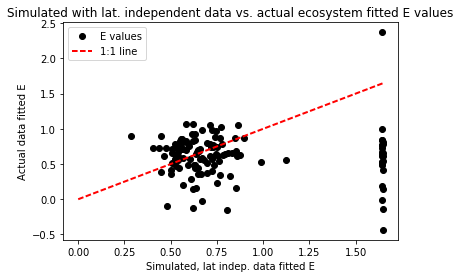

In [60]:
%matplotlib inline
plt.plot(E_vals_lat_indep.E_simulated, E_vals_lat_indep.E_actual, 'ko', label = 'E values')
plt.plot(([0, max(E_vals_lat_indep.E_simulated)]), ([0, max(E_vals_lat_indep.E_simulated)]), 'r--', lw=2, label = '1:1 line')
plt.title('Simulated with lat. independent data vs. actual ecosystem fitted E values')
plt.ylabel('Actual data fitted E')
plt.xlabel('Simulated, lat indep. data fitted E')
plt.legend()

## Simulated Es...Lat-Indep
Plotting the shape of the distributions for the simulated data's fitted E values.

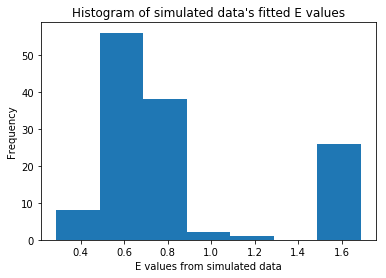

In [61]:
%matplotlib inline
binwidth = 0.2
plt.hist(E_vals_lat_indep.E_simulated, 
         bins=np.arange(min(E_vals_lat_indep.E_simulated), max(E_vals_lat_indep.E_simulated) + binwidth, binwidth))
plt.xlabel('E values from simulated data')
plt.ylabel('Frequency')
plt.title("Histogram of simulated data's fitted E values")

In [62]:
# median and mean of simulated Es
print("median: " + str(np.median(E_vals_lat_indep.E_simulated)))
print("mean: " + str(np.mean(E_vals_lat_indep.E_simulated)))

median: 0.695145389267
mean: 0.850761696195


# ****** E = 0.64 constant value (null hypothesis) *****
This is looking at a latitude-independent simulation where the Activation Energy is held as a constant value (comparing this to other simulations where Ea is species-specific, and seeing if this makes a difference in fits)

In [63]:
actual_fits = pd.read_csv("../Results/sites_boltz_fit_results.csv")
E_const_fits = pd.read_csv("../Results/constant_Ea/norm_B0_constant_Ea_simulated_E_B0.csv")

In [64]:
# getting the list of siteIDs present in the simulated data (since not 
# all sites could be simulated successfully) and then using this list
# to extract the corresponding fit data from the actual data fits
sites = pd.Series.unique(E_const_fits.site_ID).tolist()

actual_fits = actual_fits[actual_fits['site_ID'].isin(sites)]

# sorting into ascending order of siteID values since this way the indexing of the 
# two data frames will be the same.

actual_fits = actual_fits.sort_values(by = 'site_ID', ascending = True)
E_const_fits = E_const_fits.sort_values(by = 'site_ID', ascending = True)

Making a data frame fo the corresponding site IDs and their actual vs. simulated E values. 

In [65]:
E_vals_const = pd.DataFrame({'site_ID' : E_const_fits.site_ID, 'E_simulated' : E_const_fits.E, 
                       'E_actual' : actual_fits.E})

# removing any values that are Nan
E_vals_const = E_vals_const[E_vals_const.site_ID.notnull()]
E_vals_const = E_vals_const[E_vals_const.E_simulated.notnull()]
E_vals_const = E_vals_const[E_vals_const.E_actual.notnull()]

E_vals_const.head()

E_actual  E_simulated site_ID
2  0.790150     0.640223   ATNeu
3  0.642911     0.640223   AUCpr
4  0.843119     0.640223   AUCum
5  0.662818     0.640223   AURig
6  0.465215     0.640223   AUTum

## Simulated vs. Actual Es...E held constant
Plotting the E values from simulated vs. actual data. Also drawing a 1:1 line on the plot so that we can determine if there is some obvious parallel displacement from this line (or something else interesting). 

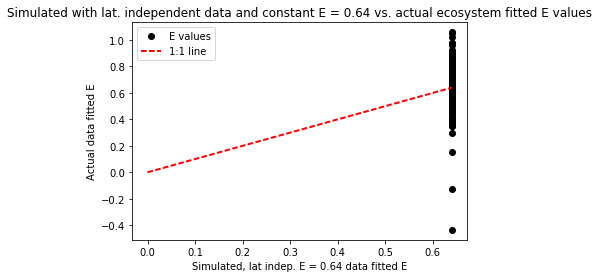

In [66]:
%matplotlib inline
plt.plot(E_vals_const.E_simulated, E_vals_const.E_actual, 'ko', label = 'E values')
plt.plot(([0, max(E_vals_const.E_simulated)]), ([0, max(E_vals_const.E_simulated)]), 'r--', lw=2, label = '1:1 line')
plt.title('Simulated with lat. independent data and constant E = 0.64 vs. actual ecosystem fitted E values')
plt.ylabel('Actual data fitted E')
plt.xlabel('Simulated, lat indep. E = 0.64 data fitted E')
plt.legend()

## Simulated Es...E held constant
Plotting the shape of the distributions for the simulated data's fitted E values.

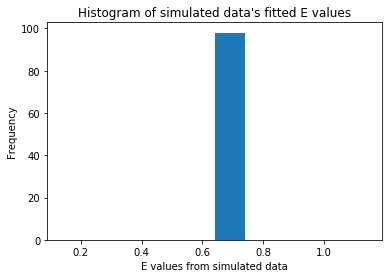

In [67]:
%matplotlib inline
binwidth = 0.2
plt.hist(E_vals_const.E_simulated)
plt.xlabel('E values from simulated data')
plt.ylabel('Frequency')
plt.title("Histogram of simulated data's fitted E values")

In [68]:
# median and mean of simulated Es
print("median: " + str(np.median(E_vals_const.E_simulated)))
print("mean: " + str(np.mean(E_vals_const.E_simulated)))

median: 0.640222815365
mean: 0.640222815365
